# Нейронные сети



## Алгоритм обратного распространения ошибки

**(4 балла)** Вам необходимо реализовать небольшой программный комплекс для обучения полносвязных нейронных сетей в рамках задачи классификации. 

<img src="http://www.asimovinstitute.org/wp-content/uploads/2016/09/cnn.png" width=500>
</img>

Программный комплекс должен поддерживать минимальный набор базовых слоев и обучение сети методом стохастического градиентного спуска с подсчетом градиентов с помощью обратного распространения ошибки. На входе у каждого из слоев будет вектор $x\in\mathbb{R}^n$, который является выходом предыдущего слоя.
Список поддерживаемых слоев должен включать в себя:

 - Полносвязный слой (Dense) с заданием количества выходных нейронов $k$:
 
 $$\mathrm{Dense} \equiv f\left(\textbf{x}\right)=\textbf{W}\textbf{x}+\textbf{b},$$
 
 где $\textbf{W}\in\mathbb{R}^{(k,n)}$ - это матрица весов слоя, $\textbf{b}\in\mathbb{R}^k$ - вектор смещений слоя.
 
 
 - Слой логистической нелинейности (Sigmoid), который применяется поэлементно ко всем входам:
 
  $$\mathrm{Sigmoid} \equiv f\left(\textbf{x}\right)=\frac{1}{1+\exp^{\textbf{-x}}}$$
  
  
  - [Dropout](https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) слой с заданием вероятности выключения нейрона ($d$). Обратите внимание, что Dropout слой ведет себя по разному в фазе обучения и в фазе применения. 
  
  В фазе обучения независимо для каждого обучающего примера сэмплируется случайная бинарная маска $\textbf{m}$, которая будет определять какие нейроны окажутся выключенными:
  
    $$\mathrm{Dropout_{train}} \equiv f\left(\textbf{x}\right)=\textbf{m}\odot\textbf{x}$$
    $$\textbf{m} \in \left\{0,1\right\}^{n}$$
    $$p\left(m_{i}=0\right)=d$$
    
  где $\odot$ $-$ это [произведение Адамара](https://ru.wikipedia.org/wiki/Произведение_Адамара), то есть покомпонентное произведение матриц.
  
  В фазе применения входные значения масштабируются, чтобы сохранить уровень активности, поступающий на следующий слой:
  
      $$\mathrm{Dropout_{test}}\equiv f\left(\textbf{x}\right)=\left(1-d\right)\textbf{x}$$


 - Softmax-слой, объединенный с cross-entropy функцией потерь. Softmax позволяет моделировать распределение вероятностей над дискретным набором классов:
     
     $$\mathrm{Softmax}_{i} \equiv p_{i}\left(\textbf{x}\right)=\frac{e^{x_{i}}}{\sum_{j}{e^{x_{j}}}}$$

    Функция потерь cross-entropy является обобщением двухклассовой логарифмической функции потерь на случай множества классов: 
    
    $$\mathcal{L}=-\sum_{i}{y_{i}\log{p_{i}}},$$

    где $\textbf{y}=\left[y_{1}...y_{i}...\right]$ $-$ это вектор, размерность которого равна количеству классов и в котором все элементы нулевые, за исключением одного элемента, соответствующего правильному классу.
    
    Можно показать, что частная производная связки softmax слоя и cross-entropy функции потерь по входу в softmax имеет простой вид:
    
    $$\frac{\partial \mathcal{L}}{\partial x_{i}}=p_{i}-y_{i}$$
    
Каждый из слоев должен быть написан в виде отдельного класса, с методами <i>fprop</i> (прямой просчет выходов сети) и <i>bprop</i> (обратный прогон сети с нахождением градиентов весовых коэффициентов):

    class Layer:
        def fprop(self, inputs, pass_type='train'):
            pass
            
        def bprop(self, outputs_deriv)
            pass
            
В метод <i>bprop</i> должен передаваться градиент по выходам данного слоя. Для слоя softmax на вход метода *fprop* должны подаваться не только выходы предыдущего слоя, но и метки классов (в виде двухэлементного списка матриц в переменной inputs).

При создании Dense слоя весовые коэффициенты должны инициализироваться из распределения $U(-0.01,0.01)$.

Кроме того, необходимо реализовать класс нейронной сети, который должен позволять конструировать сети из любой последовательности вышеназванных слоев и обучаться на входной выборке. Класс нейронной сети должен хранить в себе упорядоченный список слоев.

    class NeuralNet:
        def add(self, layer):
            pass
    
        def fit(self, X_train, y_train, batch_size, lr, num_epochs):
            pass
            
        def predict(self, X):
            pass
            
Можно предполагать, что softmax слой в сети один и всегда будет добавляться последним. Обучение должно происходить методом стохастического градиентного спуска с задаваемыми параметрами размера батча $K$ и шага обучения $\eta$:
$$\textbf{W} \leftarrow \textbf{W}-\eta \sum_{k=1}^{K}{\nabla_{\textbf{W}}L\left(\textbf{x}^k\right)}$$

В процессе обучения должен осуществляться подсчет как значения функции потерь (cross-entropy), так и ошибки классификации (процент ошибочных топ-1 предсказаний сети). Эти ошибки должны выводиться один раз в эпоху (проход по всем обучающим примерам). Методы <i>predict</i> и <i>fit</i> должны принимать на вход numpy матрицу, в строках которой содержатся обучающие примеры.

В процессе написания комплекса вам понадобится добавлять различные вспомогательные функции в исходный шаблон.

Все вычисления в описанных методах должны быть реализованы в матричной форме.

С помощью разработанных вами классов решите задачу классификации изображений [MNIST](http://yann.lecun.com/exdb/mnist/). Ваша реализация должна работать эквивалентно по качеству [решению на основе keras](https://nbviewer.jupyter.org/urls/dl.dropbox.com/s/jqx0cwwc88advxl/MNIST_example.ipynb) при той же самой архитектуре сети и параметрах обучения.

## Т.е. в идеале нужно, чтобы было лучше, чем ##

**KERAS: loss: 0.2224 - acc: 0.9318 - val_loss: 0.1799 - val_acc: 0.9466 **

In [1]:
%env OMP_NUM_THREADS=8

env: OMP_NUM_THREADS=8


## Подгрузим данные - 2

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
import codecs
import array
import struct
import os
import urllib
import gzip

def download_and_unpack_file(url):
    name_packed = os.path.basename(url)
    name = os.path.splitext(name_packed)[0]
    if not os.path.exists(name):
        print(name)
        urllib.urlretrieve(url, name_packed)
        fi = gzip.open(name_packed, 'rb')
        fo = codecs.open(name, 'wb')
        fo.write(fi.read())
        fi.close()
        fo.close()

In [5]:
import theano
import theano.tensor as T
def compile_logsoftmaxgrad():
    a =T.matrix('activations')
    p = T.nnet.softmax(a)
    ans = T.ivector('answers')
    logloss = T.nnet.categorical_crossentropy(p,ans).mean()
    grad = T.grad(logloss,a)
    return theano.function([a,ans],grad,allow_input_downcast=True)
softmaxgrad = compile_logsoftmaxgrad()


INFO (theano.gof.compilelock): Waiting for existing lock by process '32710' (I am process '36458')
INFO (theano.gof.compilelock): To manually release the lock, delete /Users/sgord1/.theano/compiledir_Darwin-16.1.0-x86_64-i386-64bit-i386-3.6.0-64/lock_dir


KeyboardInterrupt: 

In [10]:
import numpy as np

def load(samples_filename, labels_filename):
    labels_file = codecs.open(labels_filename, 'rb')
    magic, labels_size = struct.unpack('>II', labels_file.read(8))
    assert magic == 2049
    labels_array = array.array('B', labels_file.read())

    samples_file = codecs.open(samples_filename, 'rb')
    magic, samples_size, rows, cols = struct.unpack('>IIII', samples_file.read(16))
    assert magic == 2051
    assert labels_size == samples_size
    samples_array = array.array('B', samples_file.read())

    samples = np.zeros(shape = (samples_size, rows, cols), dtype=np.uint8)
    labels = np.zeros(shape = (samples_size, 1), dtype = np.uint8)

    for i in range(samples_size):
        labels[i] = labels_array[i]
        samples[i] = np.array(samples_array[i*rows*cols: (i+1)*rows*cols]).reshape(rows, cols)

    return samples, labels

In [12]:
test_images_filename = 't10k-images-idx3-ubyte'
test_labels_filename = 't10k-labels-idx1-ubyte'
train_images_filename = 'train-images-idx3-ubyte'
train_labels_filename = 'train-labels-idx1-ubyte'

test_images, test_labels = load(test_images_filename, test_labels_filename)
train_images, train_labels = load(train_images_filename, train_labels_filename)

n_train = len(train_labels)
n_test = len(test_labels)

In [14]:
X_train = []
X_test = []
for elem in train_images:
    X_train.append(elem.reshape((elem.shape[0]*elem.shape[1])))
for elem in test_images:
    X_test.append(elem.reshape((elem.shape[0]*elem.shape[1])))
y_train = train_labels
y_test = test_labels
X_train = np.array(X_train)
X_test = np.array(X_test)
print(np.array(X_test).shape, np.array(X_train).shape)

(10000, 784) (60000, 784)


[4]


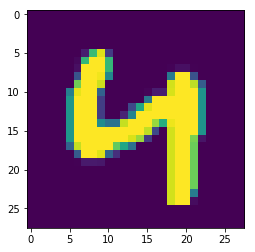

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.imshow(train_images[222], interpolation='nearest')
print(train_labels[222])

In [19]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=True):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]


## Соберем сетку ##

In [9]:
class DenseLayer:
    def __init__(self, input_size, output_size):
        self.weights = np.random.uniform(-0.01, 0.01, size=(inputs.shape[1], output.size))
   
    def fprop(self, inputs, pass_type='train'):
        if (inputs.shape[1] != self.weight.shape[0]):
            print "is", inputs.shape
            print "sw", self.weight.shape
            print 'input size error'
            pass
        self.inpt = inputs
        self.outp = W.dot(self.inpt)
        return self.outp

    def bprop(self, outputs_deriv, lr): #a_вых2 = w_2 * a_вых1 + b2
        self.weights -= lr * outputs_deriv
        grad = self.weights.transpose().dot(outputs_deriv)
        return grad

def sigm(a):
    return 1.0/(1.0+np.exp(-a))

class SigmoidLayer:
    def fprop(self, inputs, pass_type='train'):
        self.inpts = inputs
        self.outp = sigm(inputs)
        return self.outp
    
    def bprop(self, outputs_deriv, lr):
        grad = sigm(inputs)*(1 - sigm(self.imputs))*outputs_deriv
        return grad
    
class DropOut:
    def __init__(self, d):
        self.d = d
    def fprop(self, inputs, pass_type='train'):
        
    def bprop(self, outputs_deriv, lr):
        #you code
    
class SoftMax:
    def __init__(self):pass
            
    def fprop(self, inputs, real_target=None, pass_type='train'):
        #you code
    
    def bprop(self):
        #you code
        
    def get_loss(self):
        return self.loss
    
class NeuralNet:
    def __init__(self):
        self.layers = []
    def add(self, layer):
        self.layers.append(layer)

    def fit(self, X_train, y_train, lr):
        local_input = X_train
        for layer in self.layers[:-1]:
            local_input = layer.fprop(local_input)
        
        softmax_layer = self.layers[-1]
        loss, accuracy = softmax_layer.fprop(local_input,y_train)
        
        outputs_deriv = self.layers[-1].bprop()
        for layer in self.layers[:-1][::-1]:
            der_so_far = layer.bprop(outputs_deriv, lr)
            outputs_deriv = der_so_far
            
        return loss, accuracy
    
    def global_fit(self, X_train, y_train, X_test, y_test, batch_size, lr, num_epochs):
        for epoch in range(num_epochs):
            loss_total, acc_total = 0, 0
            for i,(Xb,yb) in enumerate(iterate_minibatches(np.array(X_train),np.array(y_train),batch_size,shuffle=True)):
                loss_, accuracy_ = self.fit(Xb,yb, lr)
                loss_total += loss_
                acc_total += accuracy_
            loss_val, accuracy_val = self.evaluate(X_test, y_test)
            print "epoch", epoch
            print "loss", loss_total/(i+1)
            print "accuracy", acc_total/(i+1)
            print "ON TEST"
            print "loss_val", loss_val
            print "acc_val", accuracy_val
            print " "

    def evaluate (self, X_test, y_test):
        outputs_, pred_answ_ = self.predict(X_test)
        accuracy_val = np.mean(pred_answ_ == y_test[:,0])
        real_target = y_test
        rt_matrix = np.zeros((len(real_target), 10))#матрица правильных ответов
        for ind, elem in enumerate(real_target):
            rt_matrix[ind, elem] = 1
        
        loss_val = - (rt_matrix*np.log(outputs_)).sum(axis=1).mean()  # LOSS!!!
        return loss_val, accuracy_val

    def predict(self, X):
        print ""
        local_input = X
        for layer in self.layers:
            local_input = layer.fprop(local_input, pass_type='test')
        return local_input

## Life-hack

**Сравнивать loss и градиенты с посчитанными через Theano(или другой ваш любимый фрейм). 
Если что-то не сходиться (например, у меня не сходилась прозводная L по входу в Softmax.bprop), смотреть расчеты через свое и Theano **

In [22]:
NN=NeuralNet()
NN.add(DenseLayer(784, 512))
NN.add(SigmoidLayer())
NN.add(DropOut(0.3))
NN.add(DenseLayer(512, 10))
NN.add(SoftMax())

Те же самые параметры как в решении:

In [12]:
NN.global_fit(X_train, y_train, X_test, y_test, 128, 0.1, 40)


evaluate
epoch 0
loss 2.05262787014
accuracy 0.579577323718
ON TEST
loss_val 1.78543962468
acc_val 0.7498
 

evaluate
epoch 1
loss 1.56282987542
accuracy 0.760049412393
ON TEST
loss_val 1.3384316322
acc_val 0.8087
 

evaluate
epoch 2
loss 1.19105340545
accuracy 0.81827590812
ON TEST
loss_val 1.03385704628
acc_val 0.8516
 

evaluate
epoch 3
loss 0.943307776921
accuracy 0.852547409188
ON TEST
loss_val 0.833238502639
acc_val 0.8757
 

evaluate
epoch 4
loss 0.7789597725
accuracy 0.873347355769
ON TEST
loss_val 0.698249512672
acc_val 0.8903
 

evaluate
epoch 5
loss 0.666172983165
accuracy 0.885450053419
ON TEST
loss_val 0.604033840807
acc_val 0.8975
 

evaluate
epoch 6
loss 0.585363470827
accuracy 0.892795138889
ON TEST
loss_val 0.537008876313
acc_val 0.9033
 

evaluate
epoch 7
loss 0.526724823714
accuracy 0.898237179487
ON TEST
loss_val 0.487262563126
acc_val 0.9061
 

evaluate
epoch 8
loss 0.481951735275
accuracy 0.903044871795
ON TEST
loss_val 0.448801962985
acc_val 0.9108
 

evaluate
e

** Вывод: получилось даже на более простой сетке!**
Решение на основе Keras:
loss: 0.2224 - acc: 0.9318 - val_loss: 0.1799 - val_acc: 0.9466

Теперь с ручным градиентом и более громоздкой сетью:

In [ ]:
NN=NeuralNet()
NN.add(DenseLayer(784, 512))
NN.add(SigmoidLayer())
NN.add(DropOut(0.3))
NN.add(DenseLayer(512, 512))
NN.add(SigmoidLayer())
NN.add(DropOut(0.3))
NN.add(DenseLayer(512, 10))
NN.add(SoftMax())

In [23]:
NN.global_fit(X_train, y_train, X_test, y_test, 128, 0.1, 40)


evaluate
epoch 0
loss 1.63267958114
accuracy 0.438151041667
ON TEST
loss_val 0.762013875193
acc_val 0.7968
 

evaluate
epoch 1
loss 0.635018734859
accuracy 0.824035122863
ON TEST
loss_val 0.477796910255
acc_val 0.8754
 

evaluate
epoch 2
loss 0.500606665731
accuracy 0.857989449786
ON TEST
loss_val 0.391782227217
acc_val 0.8967
 

evaluate
epoch 3
loss 0.449348702288
accuracy 0.870860042735
ON TEST
loss_val 0.355065537824
acc_val 0.9009
 

evaluate
epoch 4
loss 0.419630688811
accuracy 0.877620860043
ON TEST
loss_val 0.324826510853
acc_val 0.9126
 

evaluate
epoch 5
loss 0.40198571523
accuracy 0.881493723291
ON TEST
loss_val 0.301575796919
acc_val 0.9178
 

evaluate
epoch 6
loss 0.383222248552
accuracy 0.887870592949
ON TEST
loss_val 0.290927847831
acc_val 0.9194
 

evaluate
epoch 7
loss 0.366368868935
accuracy 0.891159188034
ON TEST
loss_val 0.270268380844
acc_val 0.9268
 

evaluate
epoch 8
loss 0.352074236028
accuracy 0.895799946581
ON TEST
loss_val 0.262155208808
acc_val 0.9269
 

ev